# Ranking dos Pilotos de 2025 com Dados

A ideia aqui neste notebook é realizar um rankeamento de pilotos com objetividade, baseado em dados, utilizando features e métodos de data science.

## Metodologia:

Utilizar features geradas com base nos dados de F1 e criarmos um algoritmo de normalização que vai trabalhar cada categoria de features e criar um score hipotético para cada piloto em cada categoria de features.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)

# Explorando features criadas

Este é o primeiro notebook que usa o pipeline de geração de features, portanto, vale a pena, e também é bom pra abordar no vídeo posteriormente, analisar as features criadas em maior detalhe para garantir que está tudo ok e ver os destaques etc.

In [2]:
# Caminhos para os arquivos
pace_path = '../../data/features/pace_features.csv'
perf_path = '../../data/features/performance_features.csv'
rel_path = '../../data/features/reliability_features.csv'

df_pace = pd.read_csv(pace_path)
df_perf = pd.read_csv(perf_path)
df_rel = pd.read_csv(rel_path)

## 1. Sanity Check: Pace Features

Verificando estrutura, nulos e distribuição básica das métricas de ritmo.

In [3]:
df_pace.describe()

,driver_id,year,avg_pace_vs_field,avg_pace_vs_teammate,avg_lap_time_std_dev_vs_field,avg_lap_time_std_dev_vs_teammate,avg_raw_lap_time_std_dev,avg_qualifying_gap_to_pole_pct,avg_qualifying_gap_to_teammate_pct
count,789.000000,789.000000,566.000000,566.000000,566.000000,566.000000,566.000000,789.000000,789.000000
mean,773.799747,2008.640051,1.002136,1.000276,0.905773,1.099251,2252.790165,0.031884,0.006527
std,50.118038,9.383792,0.006228,0.005070,0.169372,0.326195,1156.814695,0.029225,0.025383
min,619.000000,1994.000000,0.989595,0.980551,0.266337,0.291367,594.495374,0.000000,-0.069488
25%,741.000000,2000.000000,0.997999,0.997680,0.817892,0.925742,1597.041973,0.019596,-0.000216
50%,770.000000,2009.000000,1.001709,1.000099,0.902345,1.052851,2011.247786,0.027926,0.005646
75%,815.000000,2017.000000,1.005322,1.002581,0.989555,1.188074,2617.767951,0.037977,0.011372
max,864.000000,2025.000000,1.030566,1.048577,1.755580,3.132420,11721.379583,0.686675,0.660923


In [4]:
df_pace

,driver_id,year,avg_pace_vs_field,avg_pace_vs_teammate,avg_lap_time_std_dev_vs_field,avg_lap_time_std_dev_vs_teammate,avg_raw_lap_time_std_dev,avg_qualifying_gap_to_pole_pct,avg_qualifying_gap_to_teammate_pct
0,619,1994,NaN,NaN,NaN,NaN,NaN,0.003593,-0.000174
1,619,1995,NaN,NaN,NaN,NaN,NaN,0.028043,0.007205
2,622,1994,NaN,NaN,NaN,NaN,NaN,0.032837,0.011251
3,630,1994,NaN,NaN,NaN,NaN,NaN,0.038033,0.005271
4,639,1995,NaN,NaN,NaN,NaN,NaN,0.089565,-0.003742
...,...,...,...,...,...,...,...,...,...
784,861,2024,NaN,NaN,NaN,NaN,NaN,0.018282,0.013509
785,861,2025,1.002039,1.004600,1.053151,1.893511,1721.255524,0.017034,0.005936
786,862,2025,1.005597,0.999977,0.807066,0.817317,2099.572673,0.021136,0.002650
787,863,2025,0.998584,1.002484,0.881293,1.188713,1671.906256,0.017050,0.012098


## 2. Sanity Check: Performance Features

Analisando dados de performance (podiums, wins, points, etc).

In [5]:
display(df_perf.head())

print("\n--- Info ---")
df_perf.info()

print("\n--- Estatísticas Descritivas ---")
display(df_perf.describe())

print("\n--- Verificação de Nulos ---")
print(df_perf.isnull().sum()[df_perf.isnull().sum() > 0])

,driver_id,year,total_points,avg_finish_pos,avg_grid_pos,avg_positions_gained,points_per_race,avg_points_share,qualy_vs_teammate_win_rate
0,1,1950,30.0,4.166667,1.833333,-2.333333,5.000000,0.337079,0.750000
1,1,1951,22.0,7.875000,3.250000,-4.625000,3.142857,0.293333,0.600000
2,1,1952,27.0,5.375000,2.125000,-3.250000,3.857143,0.224066,0.809524
3,1,1953,32.0,5.250000,3.875000,-1.375000,4.000000,0.261224,0.700000
4,1,1954,6.0,5.000000,2.000000,-3.000000,3.000000,0.074738,0.900000



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3106 entries, 0 to 3105
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   driver_id                   3106 non-null   int64  
 1   year                        3106 non-null   int64  
 2   total_points                3106 non-null   float64
 3   avg_finish_pos              3106 non-null   float64
 4   avg_grid_pos                3106 non-null   float64
 5   avg_positions_gained        3106 non-null   float64
 6   points_per_race             3106 non-null   float64
 7   avg_points_share            3106 non-null   float64
 8   qualy_vs_teammate_win_rate  2872 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 218.5 KB

--- Estatísticas Descritivas ---


,driver_id,year,total_points,avg_finish_pos,avg_grid_pos,avg_positions_gained,points_per_race,avg_points_share,qualy_vs_teammate_win_rate
count,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,2872.000000
mean,463.120090,1977.760786,18.153725,13.501597,13.750973,0.249376,1.210414,0.228433,0.444774
std,260.142447,21.742226,51.103796,5.840501,6.980055,6.966154,2.634174,0.303546,0.316835
min,1.000000,1950.000000,0.000000,1.000000,0.000000,-38.000000,0.000000,0.000000,0.000000
25%,236.000000,1958.000000,0.000000,9.666667,8.500000,-2.569196,0.000000,0.000000,0.176471
50%,491.000000,1974.000000,0.000000,13.000000,13.600000,0.269697,0.000000,0.000000,0.444444
75%,697.000000,1994.000000,11.000000,16.428571,18.898684,4.000000,1.250000,0.442776,0.687500
max,864.000000,2025.000000,575.000000,38.000000,34.000000,30.000000,26.136364,1.000000,1.000000



--- Verificação de Nulos ---
qualy_vs_teammate_win_rate    234
dtype: int64


## 3. Sanity Check: Reliability Features

Verificando dados de confiabilidade (DNFs, falhas mecânicas).

In [6]:
display(df_rel.head())

print("\n--- Info ---")
df_rel.info()

print("\n--- Estatísticas Descritivas ---")
display(df_rel.describe())

print("\n--- Verificação de Nulos ---")
print(df_rel.isnull().sum()[df_rel.isnull().sum() > 0])

,driver_id,year,total_races,total_dnf,total_mech_dnf,dnf_rate,mechanical_dnf_rate
0,1,1950,6,6,0,1.0,0.0
1,1,1951,8,8,0,1.0,0.0
2,1,1952,8,8,0,1.0,0.0
3,1,1953,8,8,0,1.0,0.0
4,1,1954,2,2,0,1.0,0.0



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3106 entries, 0 to 3105
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   driver_id            3106 non-null   int64  
 1   year                 3106 non-null   int64  
 2   total_races          3106 non-null   int64  
 3   total_dnf            3106 non-null   int64  
 4   total_mech_dnf       3106 non-null   int64  
 5   dnf_rate             3106 non-null   float64
 6   mechanical_dnf_rate  3106 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 170.0 KB

--- Estatísticas Descritivas ---


,driver_id,year,total_races,total_dnf,total_mech_dnf,dnf_rate,mechanical_dnf_rate
count,3106.000000,3106.000000,3106.000000,3106.000000,3106.0,3106.0,3106.0
mean,463.120090,1977.760786,8.484546,8.484546,0.0,1.0,0.0
std,260.142447,21.742226,7.505226,7.505226,0.0,0.0,0.0
min,1.000000,1950.000000,1.000000,1.000000,0.0,1.0,0.0
25%,236.000000,1958.000000,1.000000,1.000000,0.0,1.0,0.0
50%,491.000000,1974.000000,6.000000,6.000000,0.0,1.0,0.0
75%,697.000000,1994.000000,16.000000,16.000000,0.0,1.0,0.0
max,864.000000,2025.000000,30.000000,30.000000,0.0,1.0,0.0



--- Verificação de Nulos ---
Series([], dtype: int64)


## 4. Visualização de Distribuições

Uma rápida visualização para identificar outliers ou comportamentos estranhos nas principais métricas.

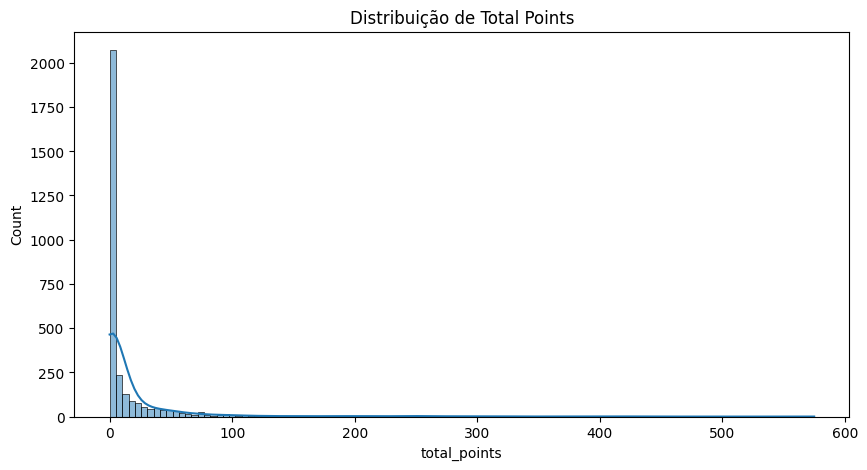

In [7]:
# Exemplo: Distribuição de Pontos por Temporada (Performance)
plt.figure(figsize=(10, 5))
sns.histplot(df_perf['total_points'], kde=True)
plt.title('Distribuição de Total Points')
plt.show()

# Exemplo: Distribuição de Avg Lap Time Gap (Pace)
if 'avg_lap_time_gap' in df_pace.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_pace['avg_lap_time_gap'], kde=True)
    plt.title('Distribuição de Avg Lap Time Gap')
    plt.show()